In [179]:
import numpy as np
import pylab as pl
import time
from IPython.display import display, clear_output
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [180]:
np.random.seed(333)

In [246]:
random_1 = np.random.randn(2,100)

In [247]:
random_1.shape

(2, 100)

In [248]:
random_2 = np.random.randn(2,100) + 2

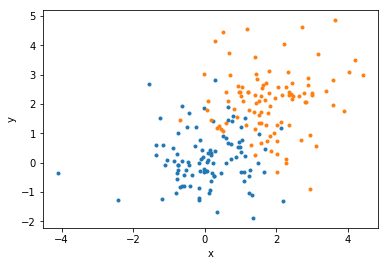

In [249]:
pl.plot(random_1[0], random_1[1], '.')
pl.plot(random_2[0], random_2[1], '.')
pl.xlabel('x')
pl.ylabel('y');

# 1. chose the number of clusters 
nclusters = 2

In [250]:
random_stack = np.hstack([random_1, random_2])

# 2. set a guess for the initial centers

In [251]:
# fix the centers to a poor initial guess
centers = np.array([[0.,-1.], [0,-2]]) 

# a better initial guess would have been
#minval, maxval = min(random_stack[0]), max(random_stack[0])
#np.array((np.random.rand(4)   * (maxval - minval)) + minval).reshape(2,2)

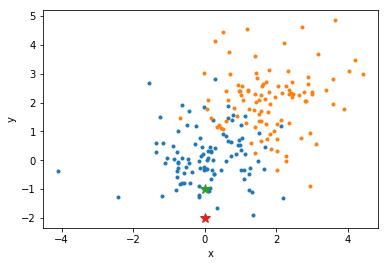

In [252]:
pl.plot(random_1[0], random_1[1], '.')
pl.plot(random_2[0], random_2[1], '.')
pl.plot(centers[0,0], centers[0,1], '*', ms=10)
pl.plot(centers[1,0], centers[1,1], '*', ms=10)
pl.xlabel('x')
pl.ylabel('y');

In [253]:
#define the distance metric - just Eucledian distance
def distmetric(x, y, center):
    distmetric = np.sqrt( (x - center[0])**2 + (y - center[1])**2)
    return distmetric

# 3. check for each point which center is closer

In [254]:
cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])

cl1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

# 4. calculate new centers

In [255]:
newc = np.array(
    [np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
        np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
print ("old center\n", centers, "\nnew center\n", newc)

old center
 [[ 0. -1.]
 [ 0. -2.]] 
new center
 [[ 0.94626302  1.12555388]
 [ 0.84779599 -1.78023073]]


In [256]:
centers[0][0] != newc[0][0] and centers[0][1] != newc[0][1] and centers[1][0] != newc[1][0] and centers[1][1] != newc[1][1]

True

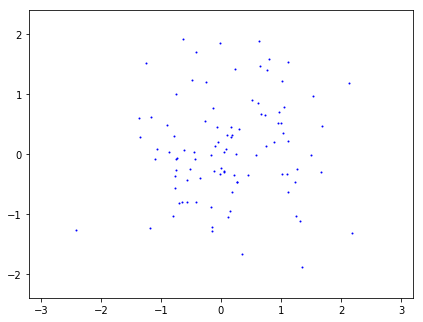

In [257]:
fig = plt.figure()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-3.2, 3.2), ylim=(-2.4, 2.4))
particles, = ax.plot([], [], 'bo', ms=6)
particles.set_data(random_1[0], random_1[1])
particles.set_markersize(1)

# 5. iterate 3&4 till convergence

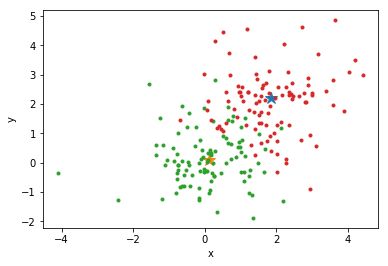

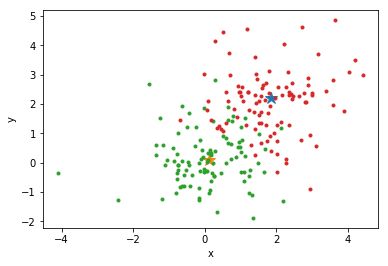

In [258]:
fig, ax = plt.subplots()
a, = ax.plot([],[],"*",markersize=12)
b, = ax.plot([],[],"*",markersize=12)
ax.set_xlabel("x")
ax.set_ylabel("y")
pl.plot(random_1[0], random_1[1], '.')
pl.plot(random_2[0], random_2[1], '.')

while(centers[0][0] != newc[0][0] and centers[0][1] != newc[0][1] and centers[1][0] != newc[1][0] and centers[1][1] != newc[1][1]):
    centers = newc
    cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
    cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])

    newc = np.array(
        [np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
            np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
    print ("old center\n", centers, "\nnew center\n", newc)

    a.set_data(centers[0,0], centers[0,1])
    b.set_data(centers[1,0], centers[1,1])
    time.sleep(2)
    clear_output(wait=True)
    display(fig)

old center
 [[ 0.93832714  1.06106277]
 [ 0.01848586 -1.89768001]] 
new center
 [[ 1.14511285  1.37746176]
 [-0.14667178 -0.89256522]]


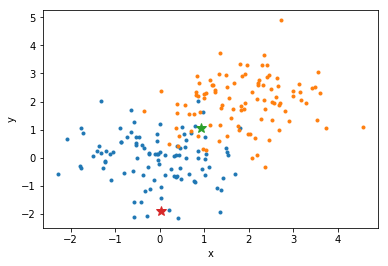

old center
 [[ 1.14511285  1.37746176]
 [-0.14667178 -0.89256522]] 
new center
 [[ 1.58671548  1.72997563]
 [-0.22817194 -0.32994132]]


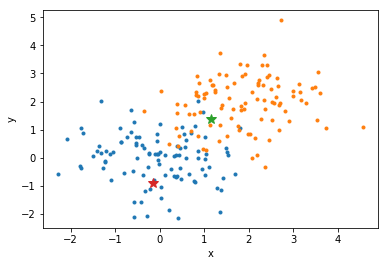

old center
 [[ 1.58671548  1.72997563]
 [-0.22817194 -0.32994132]] 
new center
 [[ 1.84489947  1.90812475]
 [-0.15247664 -0.1144667 ]]


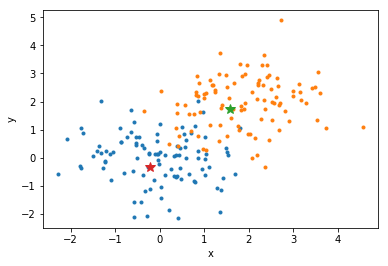

old center
 [[ 1.84489947  1.90812475]
 [-0.15247664 -0.1144667 ]] 
new center
 [[ 1.95040106  2.00717539]
 [-0.0773045  -0.0310161 ]]


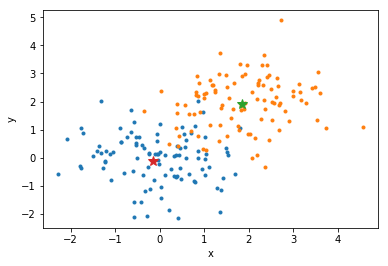

old center
 [[ 1.95040106  2.00717539]
 [-0.0773045  -0.0310161 ]] 
new center
 [[ 1.9844851   2.06335094]
 [-0.03112687 -0.0036475 ]]


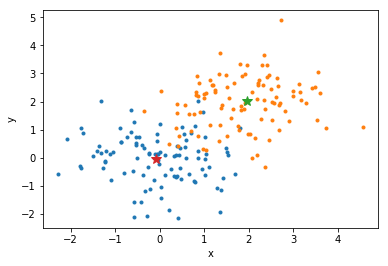

old center
 [[ 1.9844851   2.06335094]
 [-0.03112687 -0.0036475 ]] 
new center
 [[ 1.99783653  2.09507508]
 [-0.00528977  0.00779378]]


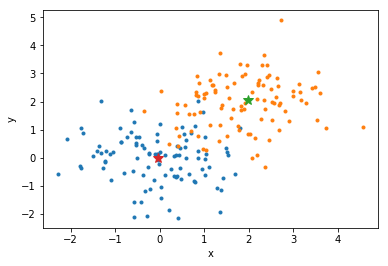

old center
 [[ 1.99783653  2.09507508]
 [-0.00528977  0.00779378]] 
new center
 [[ 1.99706484  2.11850868]
 [ 0.01355185  0.00759612]]


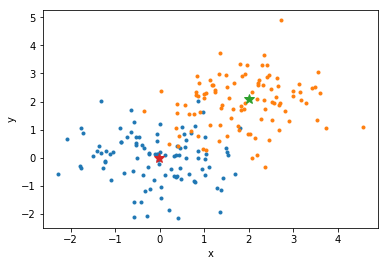

old center
 [[ 1.99706484  2.11850868]
 [ 0.01355185  0.00759612]] 
new center
 [[ 1.99706484  2.11850868]
 [ 0.01355185  0.00759612]]


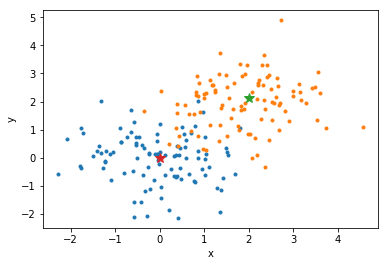

In [57]:
while(centers[0][0] != newc[0][0] and centers[0][1] != newc[0][1] and centers[1][0] != newc[1][0] and centers[1][1] != newc[1][1]):
    pl.clf()
    centers = newc
    cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
    cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])

    newc = np.array(
        [np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
            np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
    print ("old center\n", centers, "\nnew center\n", newc)
    
    pl.plot(random_1[0], random_1[1], '.')
    pl.plot(random_2[0], random_2[1], '.')
    pl.plot(centers[0,0], centers[0,1], '*', ms=10)
    pl.plot(centers[1,0], centers[1,1], '*', ms=10)
    pl.xlabel('x')
    pl.ylabel('y')
    pl.show()

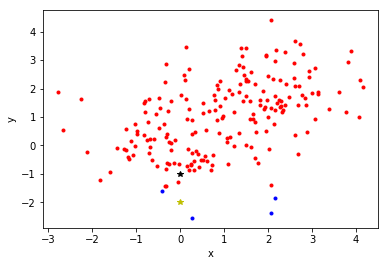

iteration 0


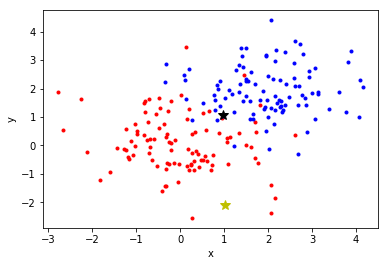

old center
 [[ 0.96972306  1.06522176]
 [ 1.02400655 -2.10176012]] 
new center
 [[ 1.0864584   1.33128024]
 [ 0.26038932 -1.02156344]]
iteration 0


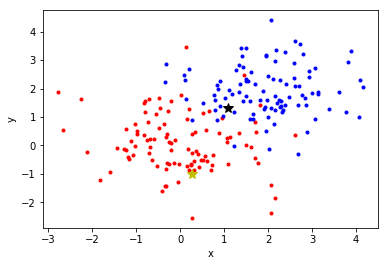

old center
 [[ 1.0864584   1.33128024]
 [ 0.26038932 -1.02156344]] 
new center
 [[ 1.51743939  1.69021039]
 [-0.19078144 -0.46081543]]
iteration 0


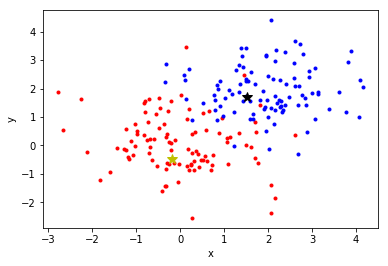

old center
 [[ 1.51743939  1.69021039]
 [-0.19078144 -0.46081543]] 
new center
 [[ 1.8303943   1.81924948]
 [-0.21623802 -0.12686326]]
iteration 0


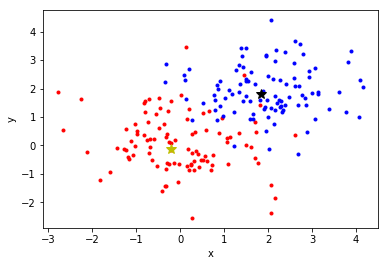

old center
 [[ 1.8303943   1.81924948]
 [-0.21623802 -0.12686326]] 
new center
 [[ 1.90521904  1.88827286]
 [-0.14843    -0.05983864]]
iteration 0


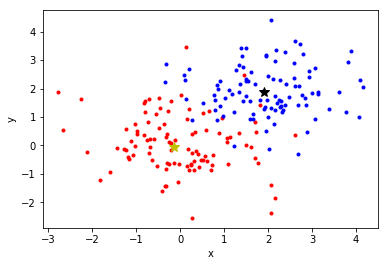

old center
 [[ 1.90521904  1.88827286]
 [-0.14843    -0.05983864]] 
new center
 [[  1.96325332e+00   1.90823820e+00]
 [ -1.26103718e-01   1.20148998e-04]]
iteration 0


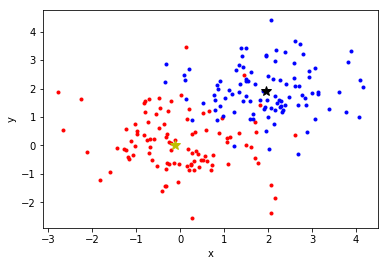

old center
 [[  1.96325332e+00   1.90823820e+00]
 [ -1.26103718e-01   1.20148998e-04]] 
new center
 [[ 2.00484901  1.92635603]
 [-0.10543728  0.03967459]]
iteration 0


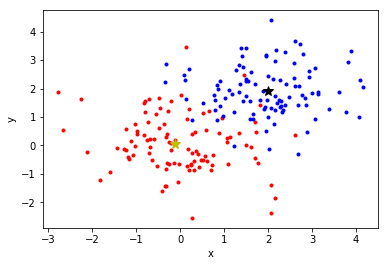

old center
 [[ 2.00484901  1.92635603]
 [-0.10543728  0.03967459]] 
new center
 [[ 2.01522567  1.93589473]
 [-0.09470755  0.04900058]]
iteration 0


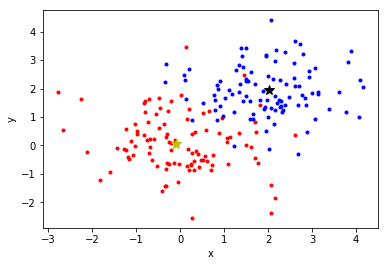

old center
 [[ 2.01522567  1.93589473]
 [-0.09470755  0.04900058]] 
new center
 [[ 2.01522567  1.93589473]
 [-0.09470755  0.04900058]]


In [84]:
[your code here... 
 and remember that this series of plots should render as an animation in your notebook.
 See how to here: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab11_fb55/animationExample.ipynb]